C:\Users\CP1984\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


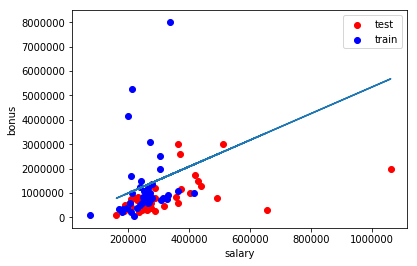

The slope of regression line is 5.44814028881
The intercept of regression line is -102360.543294


In [1]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

# Lesson 7, video 41, Extracting Slope and Intercept
print "The slope of regression line is", reg.coef_[0]
print "The intercept of regression line is", reg.intercept_

In [2]:
# Lesson 7, video 42, Regression Score: Training Data
print "The score of the regression on the training data is", reg.score(feature_train, target_train)

The score of the regression on the training data is 0.0455091926995


In [3]:
# Lesson 7, video 43, Regression Score: Test Data
print "The score of the regression on the test data is", reg.score(feature_test, target_test)

The score of the regression on the test data is -1.48499241737


In [4]:
# Lesson 7, video 44, Regressing Bonus Against LTI
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)
print "The score of the regression with feature long_term_incentive on the test data is", reg.score(feature_test, target_test)

The score of the regression with feature long_term_incentive on the test data is -0.59271289995


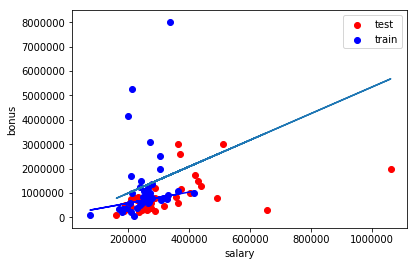

The slope of new regression line is 2.27410114127


In [5]:
# Lesson 7, video 46, Sneak Peek: Outliers Break Regressions
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
print "The slope of new regression line is", reg.coef_[0]